# Part I - (Dataset Exploration prosperLoanData)
## by (yves BOYOLO)

## Introduction
This document explore dataset containing 113 937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 


## Preliminary Wrangling


In [49]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [50]:
# load in the dataset into a pandas dataframe and copy it
pd.set_option('display.max_row',89)
pd.set_option('display.max_columns',89)

data= pd.read_csv('prosperLoanData.csv')
df= data.copy()

In [51]:
#print the head of the dataframe
print(df.shape)
print(df.dtypes.value_counts())
df.head()

(113937, 81)
float64    50
object     17
int64      11
bool        3
dtype: int64


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

by carefully observing the columns of our dataset, we realize that it is the sum of several datasets. This is materialized by the presence of id_(ListingKey,GroupKey,LoanKey,MemberKey) which indicate each time that we are changing the type of observation.

If we want our data sets to be compliant, then we must choose to study it according to only one of the tables it contains. (each type of observation is an array)

In [52]:
# we are going to work with only table1; contaning our target variable.
df= df[['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup',]]
print(df.shape)
df.head()

(113937, 23)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False


In [53]:
#observ the percentages of dtypes in our dataframe
df.dtypes.value_counts()


float64    9
object     9
int64      3
bool       2
dtype: int64

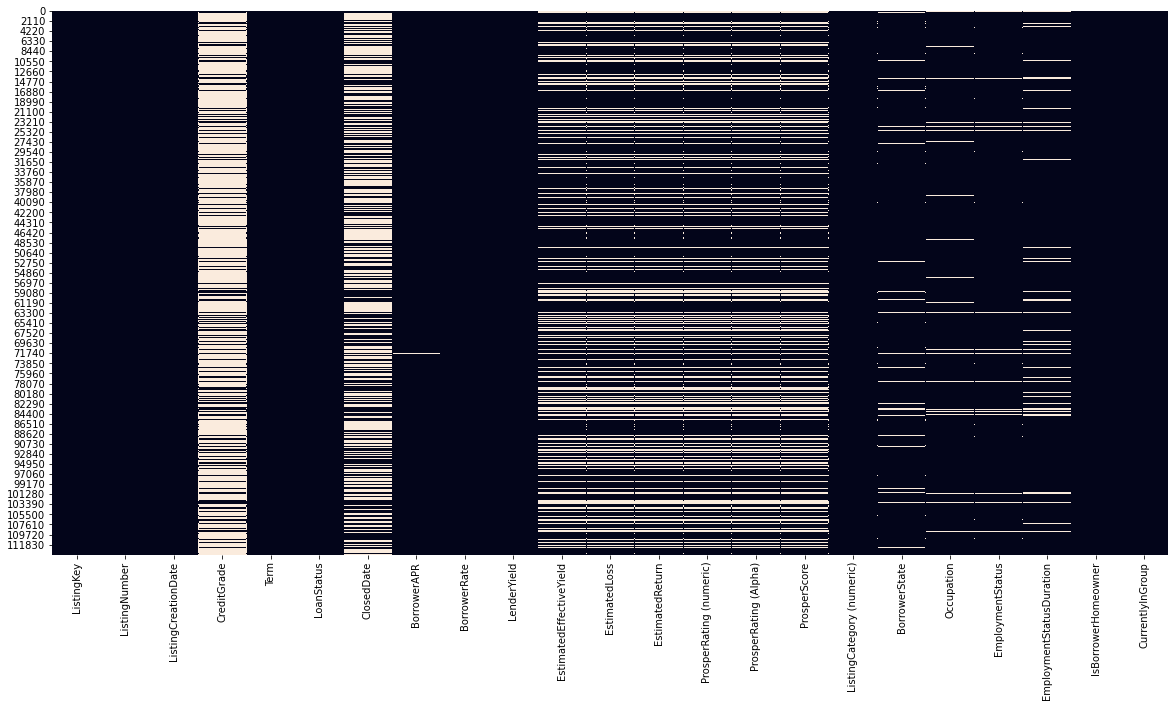

In [54]:
#plot missing values
plt.figure(figsize=(20,10))
sb.heatmap(df.isna(), cbar= False);

our dataset don't have many missing values. but we have columns with a great percentages of missing values.They will all be delated.

In [55]:
#percentage of NaN in our dataset
(df.isna().sum()/df.shape[0]).sort_values()

ListingKey                   0.000000
ListingCategory (numeric)    0.000000
IsBorrowerHomeowner          0.000000
LenderYield                  0.000000
BorrowerRate                 0.000000
CurrentlyInGroup             0.000000
Term                         0.000000
ListingCreationDate          0.000000
LoanStatus                   0.000000
ListingNumber                0.000000
BorrowerAPR                  0.000219
EmploymentStatus             0.019792
Occupation                   0.031491
BorrowerState                0.048404
EmploymentStatusDuration     0.066923
ProsperRating (Alpha)        0.255264
EstimatedLoss                0.255264
ProsperRating (numeric)      0.255264
EstimatedReturn              0.255264
EstimatedEffectiveYield      0.255264
ProsperScore                 0.255264
ClosedDate                   0.516496
CreditGrade                  0.745886
dtype: float64

In [56]:
#drop columns with a missing value rate greater than or equal to 25%
df=df[df.columns[df.isna().sum()/df.shape[0] <= 0.25]]

In [57]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,0,CO,Other,Self-employed,2.0,True,True
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,2,CO,Professional,Employed,44.0,False,False
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,0,GA,Other,Not available,NaN,False,True
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,16,GA,Skilled Labor,Employed,113.0,True,False
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,2,MN,Executive,Employed,44.0,True,False


In [58]:
#now we are going to delate uninformative columns 
df.drop(['ListingKey','ListingNumber','ListingCreationDate'],axis=1,inplace= True)

In [59]:
#To facilitate our work, we are going to drop NaN values.
df.dropna(inplace=True)

In [60]:
#show global informations of the final dataset
print(df.info())
print(df.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103245 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       103245 non-null  int64  
 1   LoanStatus                 103245 non-null  object 
 2   BorrowerAPR                103245 non-null  float64
 3   BorrowerRate               103245 non-null  float64
 4   LenderYield                103245 non-null  float64
 5   ListingCategory (numeric)  103245 non-null  int64  
 6   BorrowerState              103245 non-null  object 
 7   Occupation                 103245 non-null  object 
 8   EmploymentStatus           103245 non-null  object 
 9   EmploymentStatusDuration   103245 non-null  float64
 10  IsBorrowerHomeowner        103245 non-null  bool   
 11  CurrentlyInGroup           103245 non-null  bool   
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 8.9+ MB
None
float64    4
ob

In [61]:
#visualisation of the target
df.LoanStatus.value_counts()

Current                   55268
Completed                 32388
Chargedoff                10227
Defaulted                  3105
Past Due (1-15 days)        798
Past Due (31-60 days)       358
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     1
Name: LoanStatus, dtype: int64

In [62]:
#convert all Past Due type in a unique type PastDue
def transcat(elt):
    if 'Past Due' in elt:
        return 'Past Due'
    else:
        return elt

df.LoanStatus= df.LoanStatus.apply(transcat)
dff=df.copy()

In [63]:
#test the changes
df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'FinalPaymentInProgress', 'Cancelled'], dtype=object)

In [64]:
#convert LoanStatus in type category ordered
listestat= ['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'FinalPaymentInProgress', 'Cancelled']

catloan = pd.api.types.CategoricalDtype(ordered = True, categories = listestat)

df.LoanStatus= df.LoanStatus.astype(catloan)

In [65]:
df.LoanStatus.dtype

CategoricalDtype(categories=['Completed', 'Current', 'Past Due', 'Defaulted',
                  'Chargedoff', 'FinalPaymentInProgress', 'Cancelled'],
                 ordered=True)

In [66]:
#transform Term,BorrowerState,Occupation and EmploymentStatus as type category
catvar= ['Term','BorrowerState','Occupation','EmploymentStatus','ListingCategory (numeric)']
for cat in catvar:
    df[cat]= df[cat].astype('category')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103245 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Term                       103245 non-null  category
 1   LoanStatus                 103245 non-null  category
 2   BorrowerAPR                103245 non-null  float64 
 3   BorrowerRate               103245 non-null  float64 
 4   LenderYield                103245 non-null  float64 
 5   ListingCategory (numeric)  103245 non-null  category
 6   BorrowerState              103245 non-null  category
 7   Occupation                 103245 non-null  category
 8   EmploymentStatus           103245 non-null  category
 9   EmploymentStatusDuration   103245 non-null  float64 
 10  IsBorrowerHomeowner        103245 non-null  bool    
 11  CurrentlyInGroup           103245 non-null  bool    
dtypes: bool(2), category(6), float64(4)
memory usage: 4.7 MB


In [68]:
df['ListingCategory (numeric)'].unique()

[0, 2, 16, 1, 7, ..., 5, 9, 17, 10, 12]
Length: 21
Categories (21, int64): [0, 2, 16, 1, ..., 9, 17, 10, 12]

### What is the structure of your dataset?

the original dataset have 113937 lines and 81 columns; with 50 columns of type float, 17 of type object, 11 of type int and 3 of type bool. But, we choose to work with only 11 variables based on observation type of the dataset and missig value. At the end, our data set have fou 6 categorical values, 4 float values, and 2 boolean values.

### What is/are the main feature(s) of interest in your dataset?

We are interested to know What factors affect a loan’s outcome status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

we think that occupation, employmentStatus and Employment status duration can help us in our investigations.


## Univariate Exploration


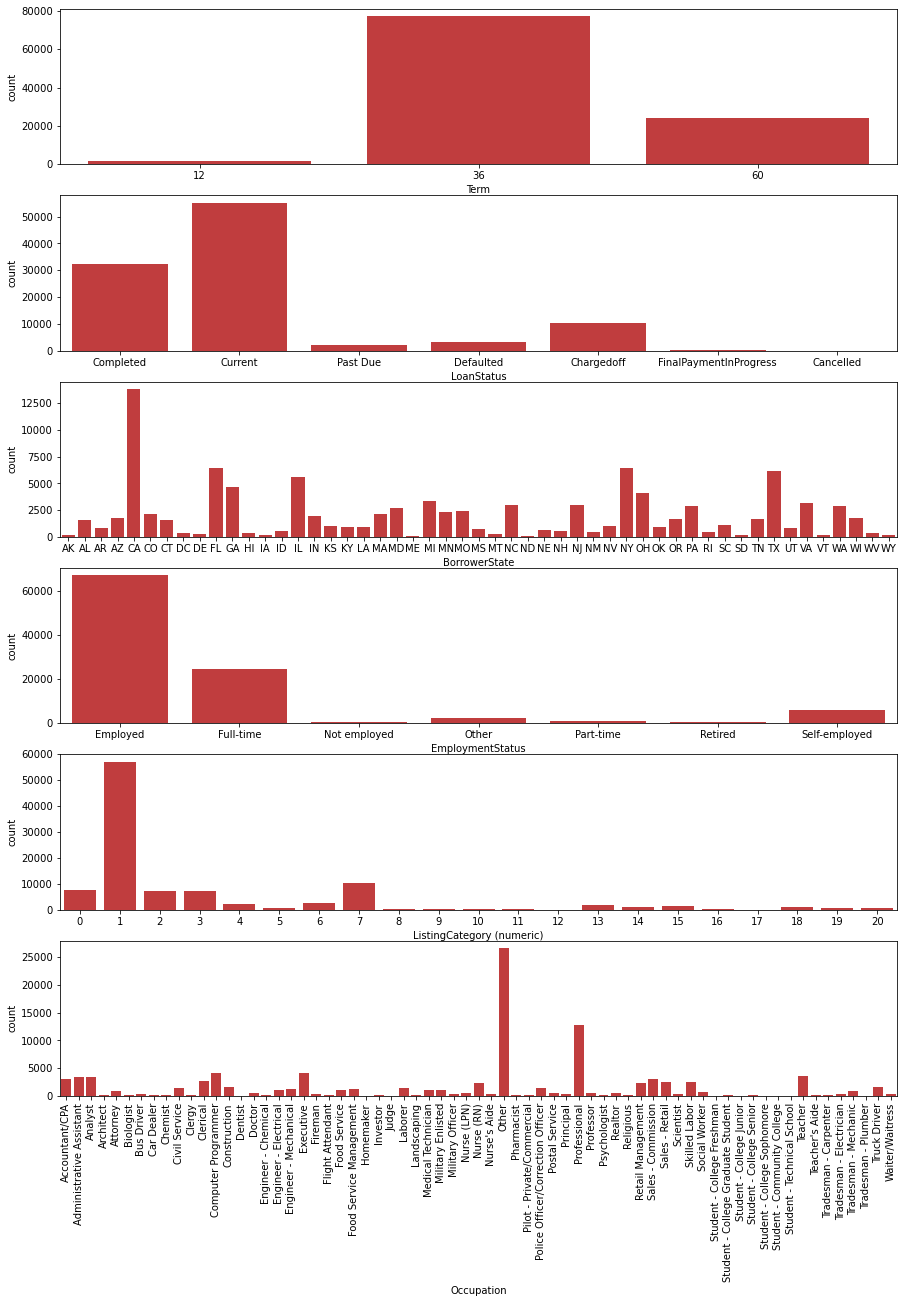

In [69]:
#visualisation of categoricals variables
base_color= sb.color_palette()[3]
fig, ax= plt.subplots(nrows=6, figsize=(15,20))

sb.countplot(data= df,x='LoanStatus',color= base_color, ax=ax[1])
sb.countplot(data= df,x='Term',color= base_color, ax=ax[0])
sb.countplot(data= df,x='BorrowerState',color= base_color, ax=ax[2])
sb.countplot(data= df,x='Occupation',color= base_color, ax=ax[5])
sb.countplot(data= df,x='EmploymentStatus',color= base_color, ax=ax[3])
sb.countplot(data= df,x='ListingCategory (numeric)',color= base_color, ax=ax[4])

plt.xticks(rotation=90);

We see on the first graph(Term) that the vast majority of people have taken out a loan for a period of 36 months.

In th second (LoanSatus),we can observe that the most represented category is **curret** folow by **completed**. the other classes **chargedoff,defaulted and Past Due** are underrepresented. FinalPaymentProgress and cancelled are quasi inexiastant. in further visualisations, we are going to ignore those last classes.

the third distribution show that the large majority of peoples have taken out the most loans in **California state (CA)**  follow by **floride(FL), New York(NY), Texas(TX) and illinoi(IL)**. these states represent the five states in which the most subscribed to a loan. 

The fourth graph shows us that the people taking out the most loans are **Employed**, followed by **full-time and self-employed**. the rest of employment status is underrepresented.

in the fifth graph, we observe that the majority of people have selectes the category **1(Debd Cosolidation)*** in ilsting category.

the last graph shows us that the dominant class of people who have subscribed to a loan is **Other**, followed by **Professional**.

In [70]:
#visualisation of float values

for col in df.select_dtypes('float'):
    print(col)

BorrowerAPR
BorrowerRate
LenderYield
EmploymentStatusDuration


C:\Users\Fabrice\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fabrice\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fabrice\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

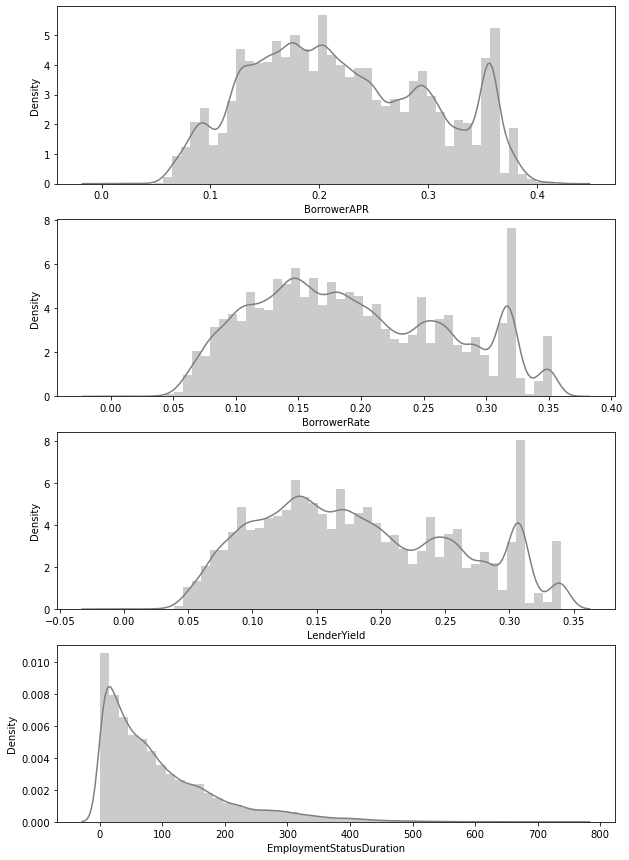

In [71]:
#Plot all distributions
fig, ax= plt.subplots(nrows= 4, figsize=(10,15))

base_color= sb.color_palette()[7]

sb.distplot(df['BorrowerAPR'], color=base_color, axlabel= 'BorrowerAPR', ax=ax[0])
sb.distplot(df['BorrowerRate'], color=base_color, axlabel= 'BorrowerRate', ax=ax[1])
sb.distplot(df['LenderYield'], color=base_color, axlabel= 'LenderYield', ax=ax[2])
sb.distplot(df['EmploymentStatusDuration'], color=base_color, axlabel= 'EmploymentStatusDuration', ax=ax[3]);

We observe that all the variables except **EmploymentStatusDuration** have roughly the same distribution, with a roughly normal shape and a peak to the right at point 0.36 for BorrowerAPR, 0.32 for BorrowerRate and LenderYield. 

The distribution of EmploymentStatusDuration is skewed to the right. Thus, we are going to make a logaritmic transformation on x axis.

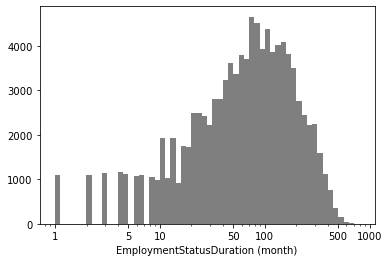

In [72]:
#transformation of EmploymentStatusDuration scale
bins= 10**np.arange(0,np.log10(df.EmploymentStatusDuration.max())+.05,.05)

plt.hist(data= df, x='EmploymentStatusDuration', bins=bins, color= base_color)
plt.xscale('log')

plt.xticks([1e0, 5, 1e1,50, 1e2,500, 1e3], [1,5, 10,50, 100, 500, 1000])
plt.xlabel('EmploymentStatusDuration (month)');

The majority of people who have taken out a loan have short-term employment contracts. When plotted on a log-scale, the EmploymentStatusDuration distribution looks roughly bimodal, with a pic arround 100 and another arround 3. 

In [73]:
#distribution of type boolean
for col in df.select_dtypes('bool'):
    print(col)


IsBorrowerHomeowner
CurrentlyInGroup


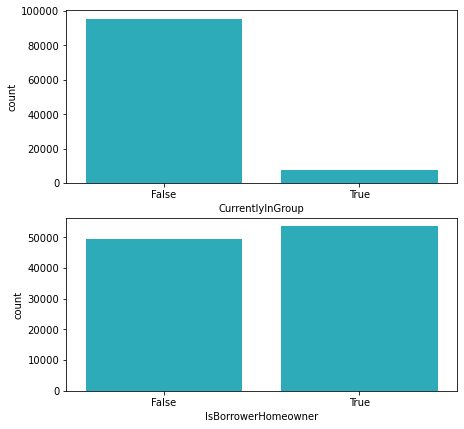

In [74]:
#barchart of boolean values

base_color= sb.color_palette()[9]
fig, ax= plt.subplots(nrows=2, figsize=(7,7))

sb.countplot(data= df,x='IsBorrowerHomeowner',color= base_color, ax=ax[1])
sb.countplot(data= df,x='CurrentlyInGroup',color= base_color, ax=ax[0]);

In [75]:
df.IsBorrowerHomeowner.value_counts(normalize=True)

True     0.519957
False    0.480043
Name: IsBorrowerHomeowner, dtype: float64

we can see that the major part of people in this case are part of a group.

We also see that there is no big difference between owning a house or not. 52% own a house and 48% do not own a house. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of the **EmploymentStatusDuration** was skewed to the right. Thus, i perform a log transform. Under the transformation, the distribution distribution looks roughly bimodal, with a pic arround 3 and another arround 100.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

of the features we investigated, ther are not unusual distribution.

## Bivariate Exploration

we are going to start by plotting correlation between all the numerical variables.

In [76]:
numeric_vars=['BorrowerAPR','BorrowerRate','LenderYield','EmploymentStatusDuration']
categoric_vars=['Term','LoanStatus','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','IsBorrowerHomeowner','CurrentlyInGroup']

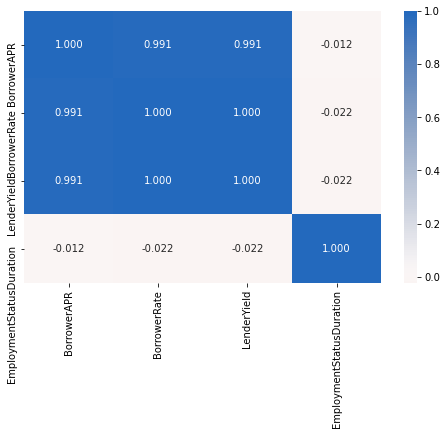

In [77]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

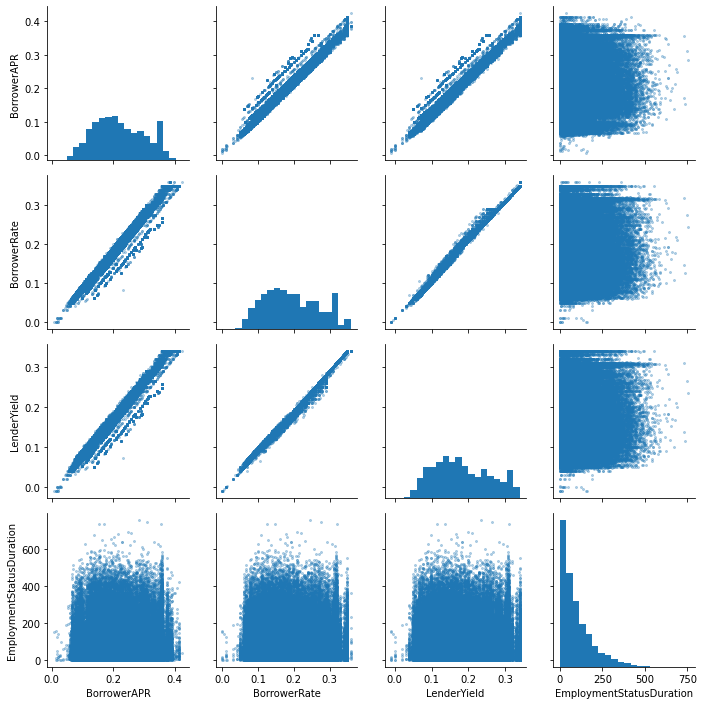

In [78]:
#plot matrix

g = sb.PairGrid(data = df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha= 0.3, s=4);

these graphs confirm the remarks we made during the univariate analysis, namely, all the numerical variables have a high correlation except for **EmploymentStatusDuration** which has a distribution skeweed on the right. We will therefore observe the correlation between this last variable in logarithmic form with the other variables.

Now, Let's move on to looking at how our numeric variables  correlates with the categorical variables.

Since the correlation is very strong between the first three numerical variables (BorrowerAPR,BorrowerRate and LenderYield), we will retain only one of them to visualize the correlation with the categorical variables.

Now we are going to do further observation of EmploymetStatusDuration en fonction de BorrowerAPR with a log transformation

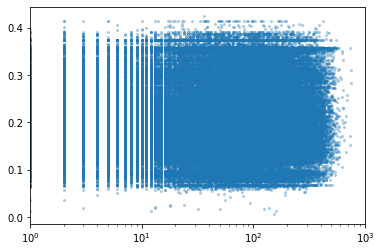

In [79]:
plt.scatter(data=df,x='EmploymentStatusDuration',y='BorrowerAPR',alpha=0.3, s=4)
plt.xscale('log')
plt.xlim((1,1000));

The log transformation don't bring additional informations

<Figure size 2160x1440 with 0 Axes>

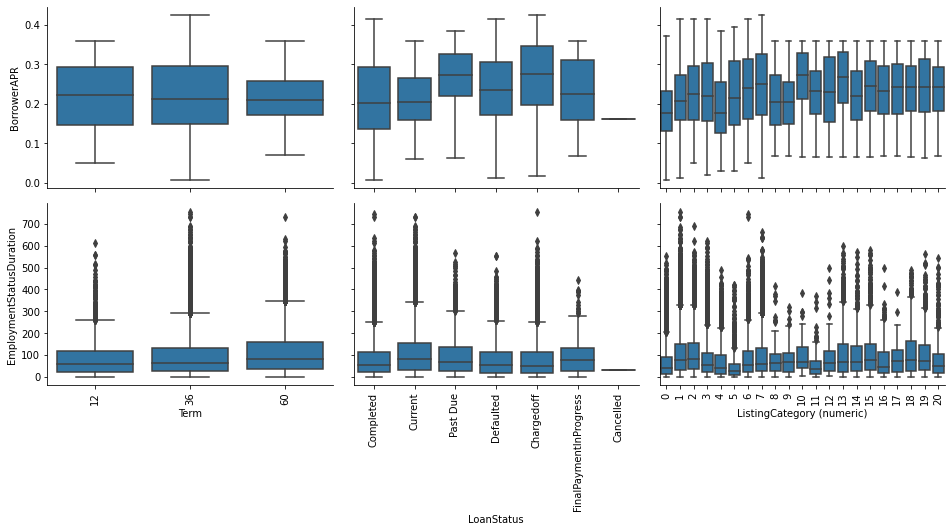

In [80]:
categoric_vars1=['Term','LoanStatus','ListingCategory (numeric)']
categoric_vars2= ['BorrowerState','Occupation']
categoric_vars3=['EmploymentStatus','IsBorrowerHomeowner','CurrentlyInGroup']

def plot(cat):

    def boxgrid(x, y, **kwargs):
        """ Quick hack for creating box plots with seaborn's PairGrid. """
        default_color = sb.color_palette()[0]
        sb.boxplot(x=x, y=y, color=default_color)
        plt.xticks(rotation=90)

    plt.figure(figsize = [30, 20])
    g = sb.PairGrid(data = df, y_vars = ['BorrowerAPR', 'EmploymentStatusDuration'], x_vars = cat,
                    height = 3, aspect = 1.5)
    maps=g.map(boxgrid)
    return maps

plot(categoric_vars1)

<Figure size 2160x1440 with 0 Axes>

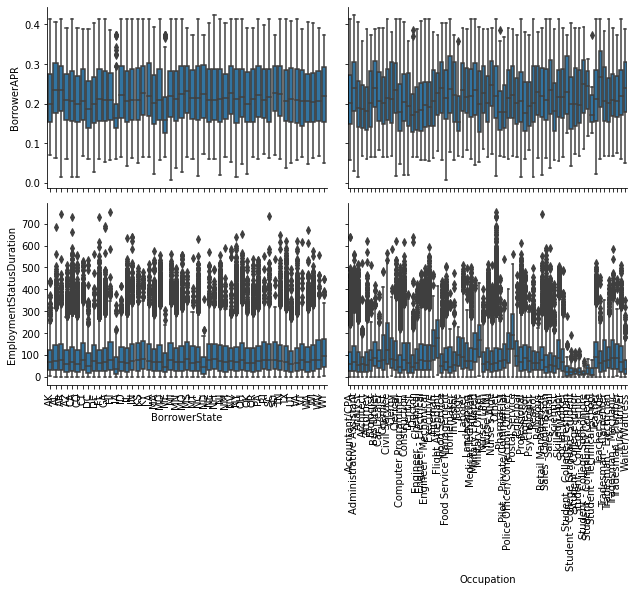

In [81]:
plot(categoric_vars2)

<Figure size 2160x1440 with 0 Axes>

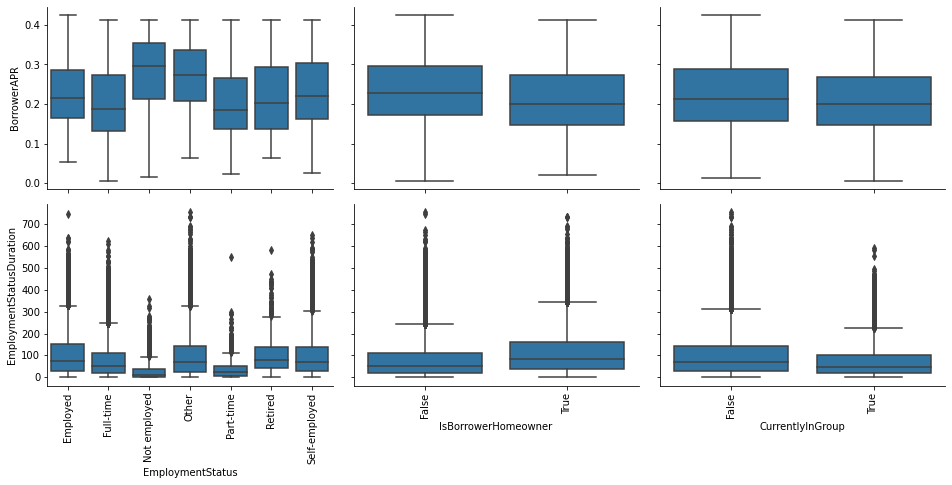

In [82]:
plot(categoric_vars3)

these graphs are very dense and it is not possible to visualize relevant information.

given that I want to know which parameter can influence the status of the loan, I will therefore create sub-datasets for each category and visualize the distributions of the continuous variables belonging to each category.

Because we are intersed about LoanStatus, we are going to produce a violin plot of the relationship between this variable and the two numeric variables

<Figure size 720x720 with 0 Axes>

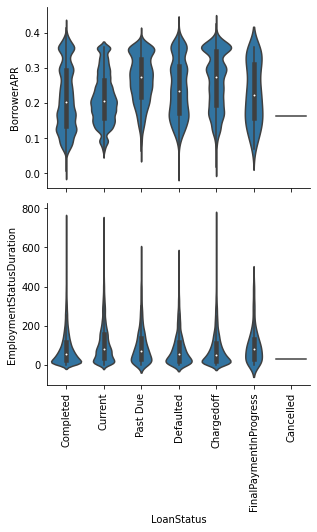

In [83]:
def violingrid(x, y, **kwargs):
        """ Quick hack for creating box plots with seaborn's PairGrid. """
        default_color = sb.color_palette()[0]
        sb.violinplot(x=x, y=y, color=default_color)
        plt.xticks(rotation=90)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, y_vars = ['BorrowerAPR', 'EmploymentStatusDuration'], x_vars = 'LoanStatus',
                height = 3, aspect = 1.5)
maps=g.map(violingrid)

EmploymentStatusDuration and BorrowerAPR don't give us additional informations

In [84]:
LoanStatus_class=['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff']


df1= df.query('LoanStatus == "Completed"') 
df2= df.query('LoanStatus == "Current"') 
df3= df.query('LoanStatus == "Past DueComplete"') 
df4= df.query('LoanStatus == "Defaulted"') 
df5= df.query('LoanStatus == "Chargedoff"') 

C:\Users\Fabrice\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fabrice\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fabrice\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

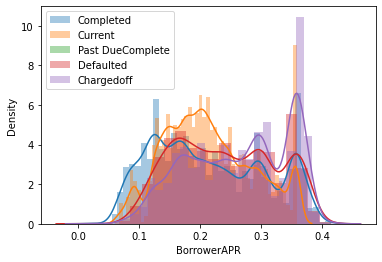

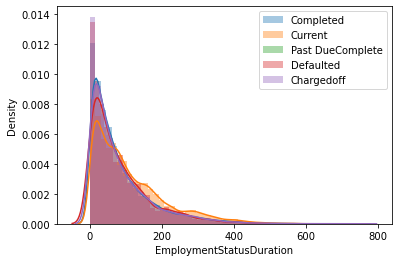

In [85]:
num_vars= ['BorrowerAPR', 'EmploymentStatusDuration']

for var in num_vars:
    plt.figure()
    sb.distplot(df1[var], label="Completed")
    sb.distplot(df2[var], label="Current")
    sb.distplot(df3[var], label="Past DueComplete")
    sb.distplot(df4[var], label="Defaulted")
    sb.distplot(df5[var], label="Chargedoff")
    plt.legend()

All distributions look identical. However, the **curruent** class seems to show a clear lag between 0.12 and 0.24.

Similarly, for this same class, we observe a shift in the distribution of EmploymentStatusDuration between 100 and 400 months.

This suggests that we could easily identify this class from the variables of the class BorrowerAPR and  EmploymentStatusDuration.

For EmploymentStatusDuration, we are now going to do the same but with a log transformation.

C:\Users\Fabrice\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fabrice\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fabrice\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

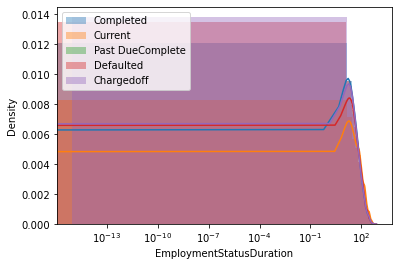

In [86]:
plt.figure()
sb.distplot(df1['EmploymentStatusDuration'], label="Completed")
sb.distplot(df2['EmploymentStatusDuration'], label="Current")
sb.distplot(df3['EmploymentStatusDuration'], label="Past DueComplete")
sb.distplot(df4['EmploymentStatusDuration'], label="Defaulted")
sb.distplot(df5['EmploymentStatusDuration'], label="Chargedoff")
plt.xscale('log')
plt.legend();

The log transformation of the employmetStatusDuration for each classe dont bring aditional informations.

Finally, let's look at relationships between the three categorical features.

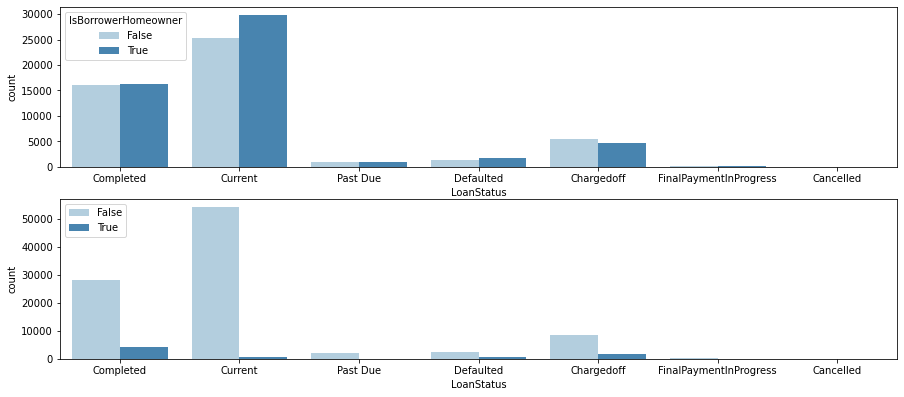

In [87]:
# swe are going now to plot relationship between LoanStatus and the others catégorical variables.
#lets start with the boolean columns

plt.figure(figsize = [15, 10])

# subplot 1: LoanStatus vs IsBorrowerHomeowner
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'Blues')

# subplot 2: LoanStatus vs. CurrentlyInGroup
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'LoanStatus', hue = 'CurrentlyInGroup', palette = 'Blues')
ax.legend() # re-arrange legend to reduce overlapping

plt.show()

the fact that a person have is own home is not suffisian to identify LoanStatus clases. except for the case of current which shows a slight lag. for this specific case, the fact of having a house makes it possible to know if wether or not someone belongs to the curruent class.

On the other hand, the fact of not belonging to a group clearly distinguishes the Loanstatus of someone. especially for current and completed classes.

For the relationship between LoanStatus and the others categorical variables, we will chose classes to plot regarding their position in the ranking of the classes appearing the most according to each of the distributions.

- **Term**: 36, 60
- **BorrowerState**: CA,FL,NY,IL
- **EmploymentStatus**: Employed,FullTime
- **ListingCategory (numeric)**: 1,7,2,2,0
- **Occupation**: Other, Professionnal


In [88]:
dft= dff.loc[dff.Term.isin([36,60])]
dfb= dff.loc[dff.BorrowerState.isin(['CA','FL','NY','IL'])]
dfe= dff.loc[dff.EmploymentStatus.isin(['Employed','Full-time'])]
dfl= dff.loc[dff['ListingCategory (numeric)'].isin([1,7,2,2,0])]
dfo= dff.loc[dff.Occupation.isin(['Other', 'Professional'])]


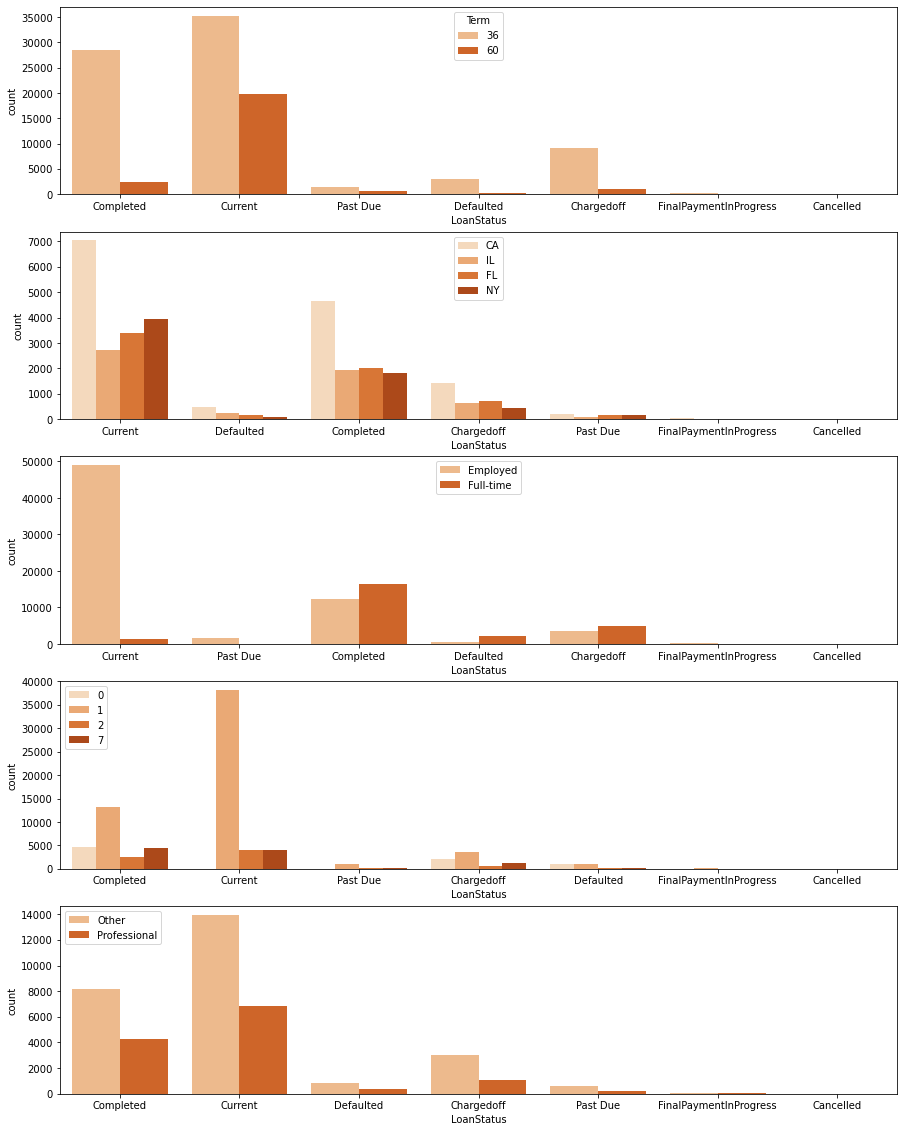

In [89]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [15, 20])

# subplot 1: LoanStatus vs Term
plt.subplot(5, 1, 1)
sb.countplot(data = dft, x = 'LoanStatus', hue = 'Term', palette = 'Oranges')

# subplot 2: LoanStatus vs. BorrowerState
ax = plt.subplot(5, 1, 2)
sb.countplot(data = dfb, x = 'LoanStatus', hue = 'BorrowerState', palette = 'Oranges')
ax.legend() 
# subplot 3: LoanStatus vs. EmploymentStatus
ax = plt.subplot(5, 1, 3)
sb.countplot(data = dfe, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Oranges')
ax.legend() 

#subplot 3: LoanStatus vs. ListingCategory (numeric)
ax= plt.subplot(5, 1, 4)
sb.countplot(data = dfl, x = 'LoanStatus', hue = 'ListingCategory (numeric)', palette = 'Oranges')
ax.legend()

#subplot 3: LoanStatus vs. Occupation
ax= plt.subplot(5, 1, 5)
sb.countplot(data = dfo, x = 'LoanStatus', hue = 'Occupation', palette = 'Oranges')
ax.legend()

plt.show()

all these graphs allow us to understand that among the classes belonging to the column LoanStatus one can be clearly identified. this is the current class. Indeed, the current class of the LoanStatus column can be identified by the classes Other of Occupation, class 1(Debd consolidation) of ListingCategory (numeric), Employed of EmploymentStatus, CA(California) of BorrowerState and 36 of Term.

Similarly, the completed class of the LoanStatus column can also be inferred; but with a lower degree of certainty from the Other class of Occupation, 1(Debd consolidation) of ListingCategory (numeric), full-time of EmploymentStatus, CA(California) of BorrowerState and 36 of Term.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

conserning our target variable, we observe that the are somme clases like current and Completed that can be identify when we use categorical variables.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

conserning the others variables, we saw that there is a great correlation between BorrowerAPR, BorrowerRate and LenderYield.

## Multivariate Exploration


let's look at the corelation between BorrowerAPR and BorrowerRate regarding LoanStatus

C:\Users\Fabrice\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


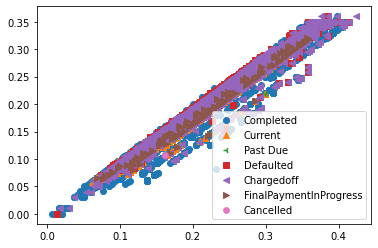

In [90]:
def multiscatter(x,y):
    cat_markers= [['Completed','o'], ['Current','^'], ['Past Due','3'], ['Defaulted','s'], ['Chargedoff','<'], ['FinalPaymentInProgress','>'], ['Cancelled','8']]

    for cat, marker in cat_markers:
        df_cat = df[df['LoanStatus'] == cat]
        map_= plt.scatter(data = df_cat, x = x, y =y, marker = marker)
    plt.legend(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff', 'FinalPaymentInProgress', 'Cancelled'])
    
    return map_
multiscatter('BorrowerAPR', 'BorrowerRate')

all the variables are regroped so we don't see additional information.

let's use a FaceGrid to look further inside each variable.

In [91]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)

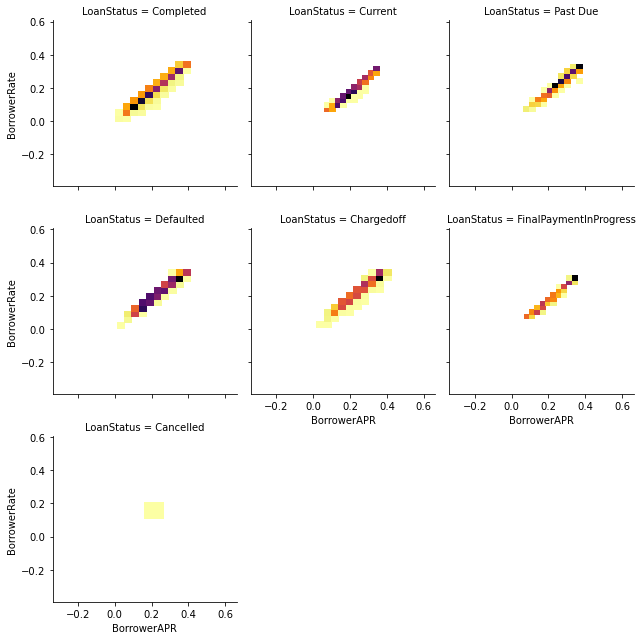

In [92]:
# create faceted heat maps on levels of the LoanStatus variable
g = sb.FacetGrid(data = df, col = 'LoanStatus', col_wrap = 3, height = 3)

g.map(hist2dgrid, 'BorrowerAPR', 'BorrowerRate', color = 'inferno_r')
g.set_xlabels('BorrowerAPR')
g.set_ylabels('BorrowerRate')

plt.show()

all the correlations are positive except BorrowerRate.

let's do the same for LoanStatus, EmploymentStatusDuration and BorrowerAPR

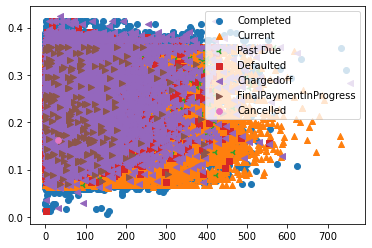

In [93]:
multiscatter('EmploymentStatusDuration','BorrowerAPR')

there is not additional informationsinside this plot

Let's created now heatmap of LoanStatus and EmploymentStatus regarding BorrowerAPR

<AxesSubplot:xlabel='LoanStatus', ylabel='EmploymentStatus'>

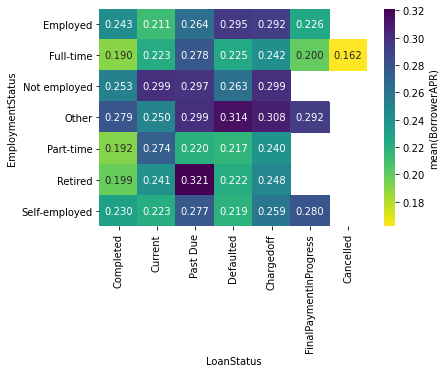

In [94]:
cat_means = df.groupby(['LoanStatus', 'EmploymentStatus']).mean()['BorrowerAPR']
cat_means = cat_means.reset_index(name = 'BorrowerAPR_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'LoanStatus',
                            values = 'BorrowerAPR_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f', cmap='viridis_r',
           cbar_kws = {'label' : 'mean(BorrowerAPR)'})

the graph shows us the average BorrowStatus for each class crossing between the classes of the LoanStatus column and the EmploymentStatus column. It may not be noticed that the maximum average of the borrower's annual percentage rate (APR) for the loan is 32.1% and corresponds to persons belonging to the classes PastDue of LoanStatus and Retired of EmploymentStatus.

the salaried and full-time classes, which are the most present and make it possible to identify the completed and current classes, have rates between 1.90 and 2.43.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
For the classes present in our variable of interest, they do not differ from each other in the cloud of points formed by the two numerical variables BorrowerAPR and BorrowerRate even after a logarithmic transformation.

### Were there any interesting or surprising interactions between features?

for each of the classes, note that the correlation between the two numerical variables (BorrowerAPR and BorrowerRate) remains linear.

## Conclusions

Having reached the end of our work in which it was a question of highlighting the variables making it possible to identify the different indebtedness status of a person, it emerges after analysis that only the Current and completed classes can relatively be deduced from certain numerical characteristics such as BorrowerAPR (The Borrower's Annual Percentage Rate (APR) for the loan), and categorical characteristics such as not belonging to a group, being of class 1 (Debd consolidation), being an employee, living in California and have an estimated loan term of 36 months.

Another class of LoanStatus can be deduced, but with a lower degree of certainty (Other class of Occupation, 1(Debd consolidation) of ListingCategory (numeric), full-time of EmploymentStatus, CA(California) of BorrowerState and 36 of Term). This is the Completed class.

As for the correlations between the variables, we realized that there is a very good linear correlation between the numerical variables (BorrowerAPR, BorrowerRate and LenderYield). However, only the EmploymetStatusDuration variable has no correlation with the others, even after performing a logarithmic transformation.